<a href="https://colab.research.google.com/github/Parkseojin2001/Machine-Learning_with_python/blob/main/Chapter5_Model-Evaluation-and-Improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter5 모델 평가와 성능 향상

In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 KB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=1edbfa9b11e33ae22783f992d5bbe6407fd7c25cfaabb870c59f07021812179b
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [2]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 1.9 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [3]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 인위적인 데이터셋 생성
X, y = make_blobs(random_state = 0)
# 데이터와 타깃 레이블을 훈련세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
# 모델 객체를 만들고 훈련 세트로 학습
logreg = LogisticRegression().fit(X_train, y_train)
# 모델을 테스트 세트로 평가
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


***Goal***

1) 교차 검증 : 안정적인 일반화 성능 측정 방법

2) score 메서드가 제공하는 정확도와 R^2 값 이외에 분류와 회귀 성능을 측정하는 방법

3) 그리드 서치 : 지도 학습 모델의 매개변수를 조정하는 데 유용

## 5.1 교차 검증

**교차 검증(cross-validation)** : 일반화 성능을 재기 위한 통계적 평가 방법으로 데이터를 여러 번 반복해서 나누고 여러 모델을 학습하는 방법이다

**k-겹 교차 검증(k-fold cross-validation)** : 가장 널리 사용되는 교차 검증 방법이며 k는 특정 숫자로 보통 5 ~ 10 을 사용함

*ex) k = 5 인 경우*

```
1) 데이터를 먼저 **폴드(fold)**라고 하는 (거의) 비슷한 크기의 '부분 집합' 다섯 개로 나눈다

2) 일련의 모델을 만든다

3) 첫 번째로 만든 모델은 첫 번째 폴드를 테스트 세트로 사용하고 나머지 폴드를 훈련 세트로 사용하여 학습

4) 두 번째 모델은 폴드 2를 테스트 세트로 사용하고 나머지(1, 3, 4, 5)의 데이터를 훈련 데이터로 사용함

5) 위의 방식으로 3, 4, 5를 테스트 세트로 사용해 반복함

6) 다섯 번의 분할마다 정확도를 측정하여, 다섯 개의 정확도 값을 얻게 됨
```

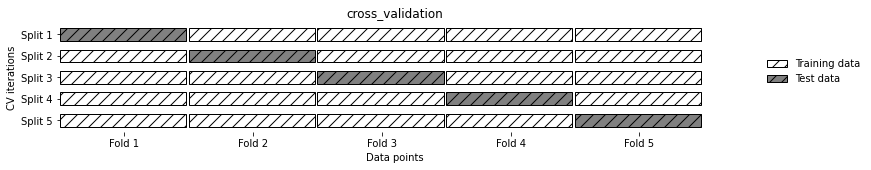

In [5]:
mglearn.plots.plot_cross_validation()

### 5.1.1 scikit-learn의 교차 검증

- scikit-learn에서 교차 검증은 model_selection 모듈의 cross_val_score 함수로 구현되어 있다.<br>

- cross_val_score 함수의 매개변수는 평가하려는 모델과 훈련 데이터, 타깃 레이블이다.

In [6]:
# iris 데이터셋에 적용한 LogisticRegression을 평가
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter = 1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("cross-validation score :", scores)

cross-validation score : [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [7]:
# cv 매개변수는 폴드의 수를 바꿀 수 있음
scores = cross_val_score(logreg, iris.data, iris.target, cv = 10)
print("cross-validation score:", scores)

cross-validation score: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [8]:
print("cross-validation mean score: {:.2f}".format(scores.mean()))

cross-validation mean score: 0.97


In [9]:
# cross-validate : 분할마다 훈련과 테스트에 걸린 시간을 담은 딕셔너리를 반환
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, return_train_score = True)

res

{'fit_time': array([0.02074981, 0.02962589, 0.02047205, 0.02219391, 0.03364253]),
 'score_time': array([0.00041485, 0.00039959, 0.00045133, 0.00039291, 0.00042558]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [10]:
res_df = pd.DataFrame(res)
res_df

,fit_time,score_time,test_score,train_score
0,0.020750,0.000415,0.966667,0.966667
1,0.029626,0.000400,1.000000,0.966667
2,0.020472,0.000451,0.933333,0.983333
3,0.022194,0.000393,0.966667,0.983333
4,0.033643,0.000426,1.000000,0.975000


In [11]:
print("평균 시간과 점수:\n", res_df.mean())

평균 시간과 점수:
 fit_time       0.025337
score_time     0.000417
test_score     0.973333
train_score    0.975000
dtype: float64


### 5.1.2 교차 검증의 장점

**장점**

- 테스트 세트에 각 샘플이 정확하게 한 번씩 들어 간다 &rarr; 교차 검증의 점수를 (그리고 평균값을) 높이기 위해서는 데이터셋에 있는 모든 샘플에 대해 모델이 잘 일반화되어야 함

- 데이터를 여러 개로 나누면 모델이 훈련 데이터에 얼마나 민감한지 알 수 있음

- 분할을 한 번 했을 때보다 데이터를 더 효과적으로 사용할 수 있음

**단점**

- 연산 비용이 늘어난다는 것( k개를 만들어야 하므로 데이터를 한 번 나눴을 때보다 대략 k배 더 느림 )

### 5.1.3 계층별 k-겹 교차 검증과 그외 전략들



In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris 레이블:\n", iris.target)

Iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


*데이터셋을 나열 순서대로 k개의 폴드로 나누는 것이 항상 좋지 않음*

Iris 레이블에서 첫 번째 1/3은 클래스 0이며 두 번째 1/3은 클래스 1이고 마지막 1/3은 클래스 2이다.<br>

첫 번째 반복에서는 테스트 세트는 클래스 0만을, 훈련 세트는 클래스 1과 2만을 가지고 있음<br>

&rarr; 이 데이터에 3-겹 교차 검증을 적용하면 모델의 정확도에 문제가 생김

해결책<br>

**계층별 k-겹 교차 검증(stratified k-fold cross-validation)** : 폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눔

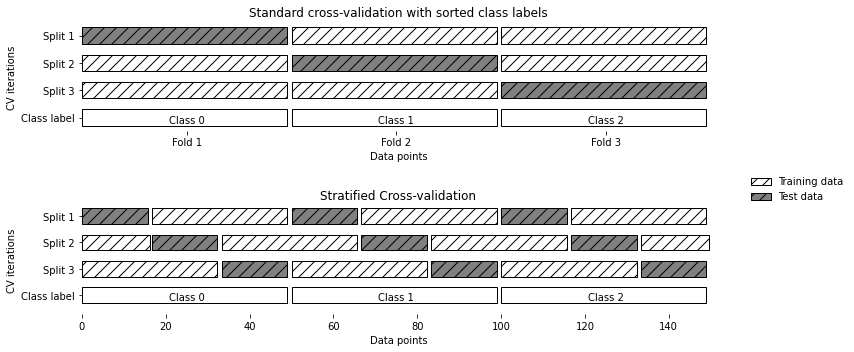

In [13]:
mglearn.plots.plot_stratified_cross_validation()

#### 교차 검증 상세 옵션

scikit-learn에서는 cv 매개변수에 **교차 검증 분할기(cross-validation splitter)**를 전달함으로써 데이터를 분할할 때 더 세밀하게 제어할 수 있다.

- 회귀 : k-겹 교차 검증

- 분류 : 계층별 k-겹 교차 검증


In [14]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5)

In [15]:
print("cross-validation score:\n", cross_val_score(logreg, iris.data, iris.target, cv = kfold))

cross-validation score:
 [1.         1.         0.86666667 0.93333333 0.83333333]


In [16]:
kfold = KFold(n_splits = 3)
print("cross-validation score:\n", cross_val_score(logreg, iris.data, iris.target, cv = kfold))

cross-validation score:
 [0. 0. 0.]


Iris 3-겹 교차 검증 문제의 해결책

- 계층별 k-겹 교차 검증

- 데이터를 섞어서 샘플의 순서를 뒤죽박죽으로 만드는 방법

In [17]:
# KFold의 shuffle 매개변수를 True로 지정 + random_state를 고정
kfold = KFold(n_splits = 3, shuffle = True, random_state = 0)
print("cross-validation score:\n", cross_val_score(logreg, iris.data, iris.target, cv = kfold))

cross-validation score:
 [0.98 0.96 0.96]


#### LOOCV

**LOOCV(Leave-one-out cross-validation) 특징**

- 폴드 하나에 샘플 하나만 들어 있는 k-겹 교차 검증

- 각 반복에서 하나의 데이터 포인트를 선택해 테스트 세트로 사용

- 데이터셋이 큰 경우에는 시간이 매우 오래 걸림

- 작은 데이터셋에서는 더 좋은 결과를 만들어냄


In [18]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)
print("교차 검증 분할 횟수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수:  150
평균 정확도: 0.97


#### 임의 분할 교차 검증

**임의 분할 교차 검증(shuffle-split cross-validation)의 특징**

- train_size만큼의 포인트로 훈련 세트를 만듦

- test_size만큼의 (훈련 세트와 중첩되지 않은) 포인트로 테스트 세트를 만들도록 분할

- n_splits 횟수만큼 반복

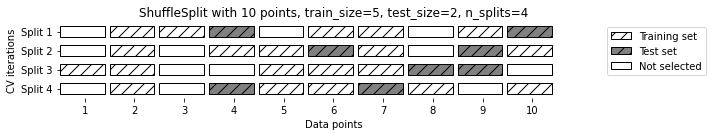

In [19]:
# 샘플이 10개인 데이터셋을 5개 포인트의 훈련 세트, 2개 포인트의 테스트 세트
# 4번 반복
mglearn.plots.plot_shuffle_split()

In [20]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size = .5, train_size = .5, n_splits = 10)
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print("cross-validation score:\n", scores)

cross-validation score:
 [0.94666667 0.94666667 0.97333333 0.96       0.93333333 0.93333333
 0.97333333 0.96       0.94666667 0.94666667]


**장점**

- 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절해야 할 때 유용

- train_size와 test_size의 합을 전체와 다르게 함으로써 전체 데이터의 일부만 사용 <br>
  &rarr; 데이터를 부분 샘플링(subsampling)하는 방식은 대규모 데이터셋으로 작업할 때 도움이 됨

*ShuffleSplit의 계층별 버전 : 분류 작업에 더 적합한 StratifiedShuffleSplit*

#### 그룹별 교차 검증

- 데이터 안에 매우 연관된 그룹이 있을 때 교차 검증을 널리 사용

ex) 얼굴 사진에서 표정을 인식하는 시스템

  - 새 얼굴에 대한 일반화 성능을 더 정확하게 평가하려면 훈련 세트와 테스트 세트에 서로 다른 사람의 사진이 들어가야함

  &rarr; groups 매개변수로 전달받을 수 있는 GroupKFold를 사용

*groups 배열 : 훈련 세트와 테스트 세트를 만들 때 분리되지 않아야 할 그룹을 지정하는 것이며, 클래스 레이블과 혼동 X*

In [21]:
from sklearn.model_selection import GroupKFold
# 인위적 데이터셋 생성
X, y = make_blobs(n_samples = 12, random_state = 0)
# 처음 세 개의 샘플은 같은 그룹에 속함
# 네 개의 샘플이 동일 
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups = groups, cv = GroupKFold(n_splits = 3))
print("cross-validation score:\n", scores)

cross-validation score:
 [0.75       0.6        0.66666667]


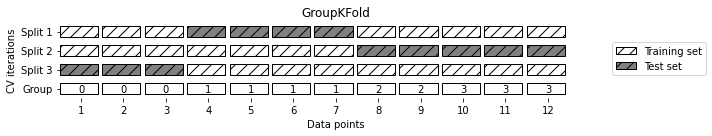

In [22]:
mglearn.plots.plot_group_kfold()

### 5.1.4 반복 교차 검증

*scikit-learn 0.19 version에 두 개의 분할기 추가*

- 회귀 : RepeatedKFold
  - KFold 클래스를 사용하여 훈련 폴드와 테스트 폴드로 분할

- 분류 : RepeatedStratifiedKFold
  - StratifiedKFold 클래스를 사용 

- 분할 폴드 수 : n_splits로 설정하며 기본값은 5임

- 반복 횟수 : n_repeats로 설정하며 기본값은 10임, 반복할 때마다 데이터를 다시 섞음

In [23]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter = 1000)

In [24]:
# 전체 검증 점수 개수 : n_splits x n_repeats (5 x 10 = 50 -> 기본값)
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state = 42)
scores = cross_val_score(logreg, iris.data, iris.target, cv = rskfold)

print("cross-validation score:\n", scores)
print("cross-validation mean score: {:.3f}".format(scores.mean()))

cross-validation score:
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
cross-validation mean score: 0.965


## 5.2 그리드 서치

**그리드 서치(grid search)** : 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도해보는 것

*RBF(radial basis function) 커널 SVM이용*

|      |C = 0.001|C = 0.01|...|C = 10|
|------|---------|--------|--------|------|
|gamma = 0.001|SVC(C = 0.001,<br>gamma = 0.001)|SVC(C = 0.01,<br>gamma = 0.001)|...|SVC(C = 10,<br>gamma = 0.001)|
|gamma = 0.01|SVC(C = 0.001,<br>gamma = 0.01)|SVC(C = 0.01,<br>gamma = 0.01)|...|SVC(C = 10,<br>gamma = 0.01)|
|...|...|...|...|
|gamma = 100|SVC(C = 0.001,<br>gamma = 100)|SVC(C = 0.01,<br>gamma = 100)|...|SVC(C = 10,<br>gamma = 100)|

### 5.2.1 간단한 그리드 서치

두 매개변수(C, gamma) 조합에 대해 분류기를 학습시키고 평가하는 간단한 그리드 서치를 for 문을 사용해 만들 수 있다.

In [25]:
# 간단한 그리드 서치 구현
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
print("Training set size: {} Test set size: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    # 매개변수의 각 조합에 대해 SVC를 훈련시킴
    svm = SVC(gamma = gamma, C = C)
    svm.fit(X_train, y_train)
    # 테스트 세트로 SVC를 평가
    score = svm.score(X_test, y_test)
    # 점수가 더 높으면 매개변수와 함께 기록
    if score > best_score:
      best_score = score
      best_parameters = {'C':C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters:", best_parameters)

Training set size: 112 Test set size: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


### 5.2.2 매개변수 과대적합과 검증 세트

문제점 : 여러 가지 매개변수 값으로 많이 시도를 통해 테스트 세트 정확도가 가장 높은 조합을 선택 &rarr; 새로운 데이터에까지 이어지지 않을 수 있음<br>
  *&rarr; 평가를 위해서는 모델을 만들 때 사용하지 않은 독립된 데이터셋이 필요*

**해결책 : 데이터를 다시 나눠서 세 개의 세트로 만들어 해결**

- 훈련 세트로는 모델 만들기

- 검증 (또는 개발) 세트로는 모델의 매개변수를 선택

- 테스트 세트로는 선택된 매개변수의 성능을 평가

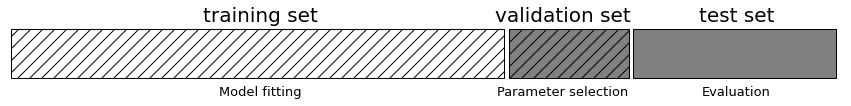

In [26]:
mglearn.plots.plot_threefold_split()

In [27]:
from sklearn.svm import SVC
# 데이터를 훈련 + 검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state = 0)
# 훈련 + 검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = 1)
print("Training set size: {}  Validation set size: {} Test set size: {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    # 매개변수의 각 조합에 대해 SVC를 훈련
    svm = SVC(gamma = gamma, C = C)
    svm.fit(X_train, y_train)
    # 검증 세트로 SVC를 평가
    score = svm.score(X_valid, y_valid)
    # 점수가 더 높으면 매개변수와 함께 기록
    if score > best_score:
      best_score = score
      best_parameters = {'C': C, 'gamma': gamma}
  
# 훈련 세트와 검증 세트를 합처 모델을 다시 만든 후 테스트 세틀르 사용해 평가
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Highest score in validation set: {:.2f}".format(best_score))
print("Best parameters: ",best_parameters)
print("Best test score in best parameters: {:.2f}".format(test_score))

Training set size: 84  Validation set size: 28 Test set size: 38

Highest score in validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Best test score in best parameters: 0.92


최적 매개변수에서 테스트 세트 점수에 따르면 92%만 정확하게 분석한다고 할 수 있다.

**최종 평가에만 사용하도록 테스트 세트를 분리해 유지하는 것이 중요함**

모든 탐색적 분석과 모델 선택을 위해서는 훈련 세트와 검증 세트를 사용하는 것을 권장하며, 마지막 평가를 위해 테스트 세트를 보관하는 것을 추천함.

### 5.2.3 교차 검증을 사용한 그리드 서치

일반화 성능을 더 잘 평가하려면 훈련 세트와 검증 세트를 한 번만 나누지 않고, 교차 검증을 사용해서 각 매개변수 조합의 성능을 평가할 수 있다.

In [28]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    # 매개변수의 각 조합에 대해 SVC를 훈련
    svm = SVC(gamma = gamma, C = C)
    # 교차 검증을 적용
    scores = cross_val_score(svm, X_trainval, y_trainval, cv = 5)
    # 교차 검증 정확도의 평균을 계산
    score = np.mean(scores)
    # 점수가 더 높으면 매개변수와 함께 기록
    if score > best_score:
      best_score = score
      best_parameters = {'C': C, 'gamma' : gamma}
# 훈련 세트와 검증 세트를 합처 모델 만들기
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

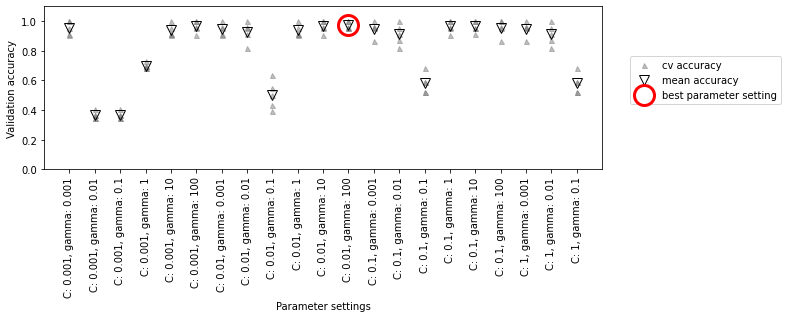

In [29]:
# 교차 검증을 사용한 그리드 서치의 결과
mglearn.plots.plot_cross_val_selection()

**그래프 분석**

각 매개변수 설정마다 교차 검증 분할에 한 개씩, 모두 다섯 개의 값을 계산하며 교차 검증 정확도 평균이 가장 높은 매개변수를 동그라미로 표시함

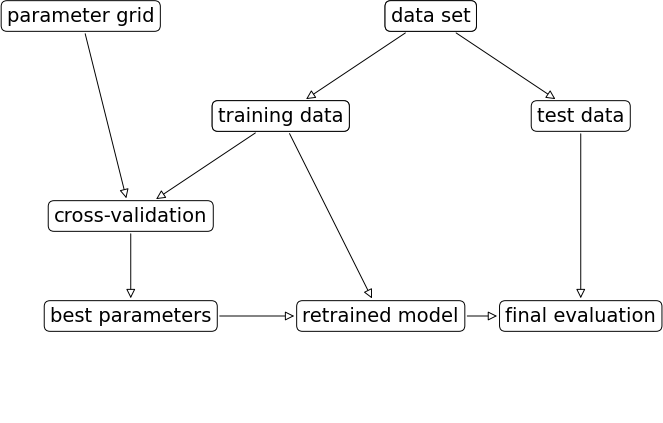

In [30]:
# 교차 검증과 그리드 서치를 사용한 매개변수 선택과 모델 평가의 작업 흐름
mglearn.plots.plot_grid_search_overview()

**GridSearchCV** : 교차 검증을 사용한 그리드 서치를 매개변수 조정 방법으로 널리 사용하므로 추정기 형태로 구현

- 딕션너리 형태로 검색 대상 매개변수를 지정

- 딕션너리 키는 조정하고자 하는 매개변수 이름이고, 값은 탐색할 매개변수의 설정값임

In [31]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드:\n", param_grid)

매개변수 그리드:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [32]:
# 모델(SVC), 검색 대상 매개변수 그리드(param_grid), 원하는 교차 검증(5-겹 계층별 교차 검증)으로 GridSearchCV의 객체 생성
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv = 5, return_train_score = True)

In [33]:
# 과대적합 방지 : 데이터를 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)

In [34]:
# fit 메서드 : param_grid에 설정된 매개변수 조합에 대한 교차 검증을 수행
# 최적의 매개변수를 찾는 일 + 가장 좋은 매개변수로 전체 훈련 데이터셋에 대해 세로운 모델을 자동으로 생성
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [35]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


- **매개변수를 선택하는 데 테스트 세트를 사용 X**


In [36]:
# 선택한 매개변수 : best_params_ 속성에 저장
# 최상의 교차 검증 정확도 : best_score_에 저장
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [37]:
# 실제 모델에 직접 접근이 필요한 경우(ex. 계수 or 특성 중요도)
print("최고 성능 모델:\n", grid_search.best_estimator_)

최고 성능 모델:
 SVC(C=10, gamma=0.1)


#### 교차 검증 결과 분석

- 교차 검증의 결과를 시각화하면 검색 대상 매개변수가 모델의 일반화에 영향을 얼마나 주는지 이해하는 데 도움이 됨.

- 그리드 서치는 연산 비용이 매우 크므로 비교적 간격을 넓게 하여 적은 수의 그리드로 시작하는 것이 좋음

- 딕션너리 cv_results_ 속성 : 검색과 관련한 여러 정보가 함께 저장되어 있음

In [38]:
pd.set_option('display.max_columns', None)
# DataFrame으로 변환
results = pd.DataFrame(grid_search.cv_results_)
# 처음 다섯 개 행을 출력
np.transpose(results.head())

,0,1,2,3,4
mean_fit_time,0.005432,0.003076,0.006642,0.001592,0.001543
std_fit_time,0.003427,0.002859,0.008792,0.000037,0.000087
mean_score_time,0.000994,0.000746,0.000777,0.00068,0.000667
std_score_time,0.000464,0.000146,0.000075,0.000027,0.000023
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


**출력된 표 분석**

- results의 행 하나는 특정한 하나의 매개변수 설정에 대응

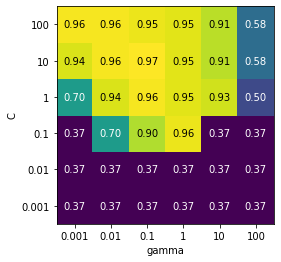

In [39]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# 교차 검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, xlabel = 'gamma', xticklabels = param_grid['gamma'], ylabel = 'C', yticklabels = param_grid['C'], cmap = "viridis")
plt.show()

**히트맵 분석**

- 히트맵의 각 포인트는 특정 매개변수 설정에 대한 교차 검증 실행을 나타냄

- 교차 검증의 정확도가 높으면 밝은 색으로, 낮으면 어두운 색을 나타남

- SVC가 매개변수 설정에 매우 민감함

- 각 매개변수의 최적값이 그래프 끝에 놓이지 않도록 매개변수의 범위가 충분히 넓음

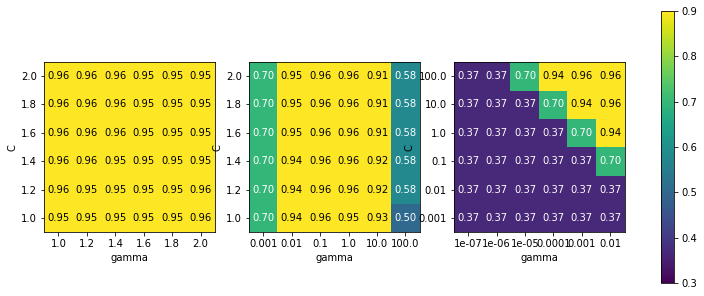

In [40]:
fig, axes = plt.subplots(1, 3, figsize = (13, 5))

param_grid_linear = {'C' : np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma' : np.logspace(-3, 2, 6)}

param_grid_range = {'C' : np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
  grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
  grid_search.fit(X_train, y_train)
  scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

  # 교차 검증 평균 점수의 히트맵 그래프
  scores_image = mglearn.tools.heatmap(
      scores, xlabel = 'gamma', ylabel = 'C', xticklabels = param_grid['gamma'],
      yticklabels = param_grid['C'], cmap = "viridis", ax = ax, vmin = 0.3, vmax = 0.9)
plt.colorbar(scores_image, ax= axes.tolist())
plt.show()

**히트맵 분석**

1) 그래프의 점수 변화가 거의 없어서 전체 매개변수 그리드가 같은 색인 히트맵

- 매개변수 C와 gamma의 스케일과 범위가 부적절할 때 발생

- 매개변수 설정이 바뀌어도 변화가 없다면 그 매개변수가 전혀 중요하지 않은 것일 수 있음

2) 세로 띠 형태를 보이는 히트맵

- gamma 매개변수만 정확도에 영향을 줌

- gamma 매개변수는 적절한 범위를 탐색하고 있지만, C 매개변수는 그렇지 못하거나 중요한 매개변수가 아님

3) C와 gamma 둘 모두에 따라 값이 변하지만 왼쪽 아래는 변화가 없는 히트맵

- 다음 번 검색 땐 매개변수 그리드에서 매우 작은 단위는 제외

- 최적치가 그래프의 경계에 존재 &rarr; 경계 너머에 더 나은 값이 있다고 예상

교차 검증 점수를 토대로 매개변수 그리드를 튜닝하는 것이 아주 안전한 방법이며, 매개변수들의 중요도를 확인하는 것이 좋다.

**최종 테스트 세트를 대상으로 여러 매개변수 범위를 테스트해서는 안되며, 사용할 모델을 정확히 정한 뒤 딱 한 번만 사용해야한다.**

#### 비대칭 매개변수 그리드 탐색

어떤 경우에는 모든 매개변수의 조합에 대해 GridSearchCV를 수행하는 것잉 좋은 방법이 아닐 수 있다.

*ex) SVC*

1) kernel = 'linear' 인 경우

- 선형 모델이며 C 매개변수만 사용

2) kernel = 'rbf' 인 경우

- C와 gamma를 모두 사용

*kernel = 'linear' 이면 gamma의 값에 대해 조사하는 것은 시간 낭비이다.

**조건부 매개변수 조합을 사용하려면 param_grid를 딕션너리 리스트로 만들어 전달**

In [41]:
param_grid = [{'kernel': ['rbf'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100]}]

print("Grid list:\n", param_grid)

Grid list:
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


- 첫 번째 그리드에서 kernel 매개변수는 rbf로 고정되고 C와 gamma 두 매개변수는 바뀜

- 두 번째 그리드에서 kernel 매개변수는 linear로 고정되고 C만 바뀜


In [42]:
grid_search = GridSearchCV(SVC(), param_grid, cv = 5, return_train_score = True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [43]:
results = pd.DataFrame(grid_search.cv_results_)
# 좀 더 나은 출력을 위해 결과를 전치
results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.001876,0.001615,0.001666,0.001647,0.00187,0.001857,0.003216,0.002624,0.001688,0.001874,0.001826,0.001869,0.001598,0.00159,0.001422,0.001671,0.00287,0.00204,0.00183,0.00135,0.001137,0.001212,0.002022,0.006543,0.00142,0.002248,0.003373,0.006531,0.00666,0.006666,0.002629,0.007494,0.001054,0.002257,0.006862,0.003599,0.004012,0.00133,0.001089,0.001121,0.001069,0.000996
std_fit_time,0.000075,0.000055,0.000059,0.000016,0.000249,0.000126,0.003108,0.001735,0.000055,0.00024,0.000152,0.000043,0.000095,0.000062,0.000093,0.000373,0.001471,0.000098,0.000216,0.000019,0.000029,0.000128,0.000335,0.004551,0.000188,0.002554,0.004372,0.010129,0.006206,0.001641,0.002759,0.006227,0.000046,0.001449,0.004058,0.00241,0.00284,0.000062,0.000033,0.000039,0.000039,0.000092
mean_score_time,0.000778,0.000685,0.000692,0.000679,0.000705,0.000704,0.001031,0.001727,0.000732,0.000717,0.000752,0.000709,0.000666,0.000687,0.000623,0.002106,0.000798,0.000775,0.000789,0.000641,0.000582,0.000507,0.001711,0.00249,0.000642,0.000514,0.000624,0.001419,0.002259,0.001185,0.000688,0.001168,0.000564,0.002064,0.00386,0.000885,0.002193,0.000548,0.000492,0.000489,0.000478,0.000447
std_score_time,0.000088,0.000029,0.000036,0.000025,0.000034,0.000033,0.000633,0.00189,0.000068,0.000045,0.000047,0.000014,0.000034,0.000028,0.000016,0.002957,0.000062,0.000016,0.00011,0.000031,0.000054,0.000073,0.002086,0.002813,0.000063,0.000099,0.000134,0.00154,0.00276,0.000262,0.00011,0.000874,0.000118,0.002568,0.003454,0.000114,0.001723,0.000031,0.000025,0.000024,0.000021,0.000009
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel':

#### 그리드 서치에 다양한 교차 검증 적용

- GridSearchCV는 분류에는 기본적으로 계층형 k-겹 교차 검증을 사용하고 회귀에서는 k-겹 교차 검증을 사용함

- GridSearchCV의 cv 매개변수를 통해 다른 교차 검증 분할기를 사용이 가능

- 훈련 세트와 검증 세트로 한 번만 분할하려면 n_splits = 1로 하고 ShuffleSplit나 StratifiedShuffleSplit를 사용(데이터셋이 매우 크거나 모델 구축에 시간이 오래 걸릴 때 유용)

#### 중첩 교차 검증

**중첩 교차 검증(nested cross-validation)** : 원본 데이터를 훈련 세트와 테스트 세트로 한 번만 나누는 방식 대신 더 나아가 교차 검증 분할 방식

1) 테스트 점수의 목록을 만들어줌

2) 각 훈련 세트에 대해 그리드 서치를 실행

3) 바깥쪽에서 분할된 테스트 세트의 점수를 최적의 매개변수 설정을 사용해 각각 측정

- 테스트 점수의 목록을 만들어줌

- 그리드 서치를 통해 찾은 최적 매개변수가 모델을 얼마나 잘 일반화시키는지 알 수 있음

- 특정 데이터셋에서 주어진 모델이 얼마나 잘 일반화되는지 평가하는 데 유용

In [44]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}

scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv = 5), iris.data, iris.target, cv = 5)
print("Cross-validation score: ", scores)
print("Cross-validation mean score: ", scores.mean())

Cross-validation score:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
Cross-validation mean score:  0.9800000000000001


**중첩 교차 검증의 결과**

"SVC는 iris 데이터셋에서 평균 교차 검증 정확도가 98%다" 라고 할 수 있다.

In [45]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
  outer_scores = []
  # outer_cv의 분할을 순회하는 for 루프
  # (split 메소드는 훈련과 테스트 세트에 해당하는 인덱스를 반환)
  for training_samples, test_samples in outer_cv.split(X, y):
    # 최적의 매개변수 찾기
    best_parms = {}
    best_score = -np.inf
    # 매개변수 그리드를 순회
    for parameters in parameter_grid:
      # 안쪽 교차 검증의 점수를 기록
      cv_scores = []
      # inner_cv의 분할을 순회하는 for 루프
      for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]): # 훈련 데이터와 주어진 매개변수로 분류기 만들기
        clf = Classifier(**parameters)
        clf.fit(X[inner_train], y[inner_train])
        # 검증 세트로 평가
        score = clf.score(X[inner_test], y[inner_test])
        cv_scores.append(score)
      # 안쪽 교차 검증의 평균 점수를 계산
      mean_score = np.mean(cv_scores)
      if mean_score > best_score:
        # 점수가 더 높으면 매개변수와 함께 기록
        best_score = mean_score
        best_params = parameters
       # 바깥쪽 훈련 데이터 전체를 사용해 분류기 만들기
    clf = Classifier(**best_params)
    clf.fit(X[training_samples], y[training_samples])
    # 테스트 세트를 사용해 평가
    outer_scores.append(clf.score(X[test_samples], y[test_samples]))
  return np.array(outer_scores)  


In [46]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation score:", scores)

Cross-validation score: [0.96666667 1.         0.96666667 0.96666667 1.        ]


#### 교차 검증과 그리드 서치 병렬화

그리드 서치는 데이터 용량이 크고 매개변수 수도 많을 때는 상당한 연산 부하를 일으키지만, 다행히 쉽게 병렬화가 가능하다. <br>
&rarr; 그리드 서티와 교차 검증은 여러 CPU 코어 또는 클러스터를 병렬화 

***NOTE_ RandomizedSearchCV***

RandomizedSearchCV : 검색이 빠르기 때문에, 매개변수의 조합이 매우 많거나 규제 매개변수 C와 같이 연속형 값을 조정해야 할 때 널리 사용

- n_iter  매개변수(기본값 10)로 탐색 횟수를 조정할 수 있어 컴퓨팅 지원에 맞게 탐색을 실행

- 샘플링 가능한 분포를 지정

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

param_dist = [{'kernel': ['rbf'], 'C': loguniform(0.001, 100), 'gamma': loguniform(0.001, 100)},
              {'kernel': ['linear'],'C': loguniform(0.001, 100)}]

In [48]:
rand_search = RandomizedSearchCV(SVC(), param_dist, n_iter = 20, random_state = 42, n_jobs = -1)
rand_search.fit(X_train, y_train)
print("Best parameters:", rand_search.best_params_)
print("Best cross-validation score: {:.2f}".format(rand_search.best_score_))

Best parameters: {'C': 1.7965626423790642, 'kernel': 'linear'}
Best cross-validation score: 0.97


***NOTE_HalvingGridSearchCV***

HalvingGridSearchCV : 모든 파라미터 조합에 대해 제한된 자원으로 그리드서치를 실행한 다음 가장 좋은 후보를 골라서 더 많은 자원을 투여하는 식으로 반복적으로 탐색을 수행함 = **SH**라고도 부름

- resource 매개변수 : 반복마다 늘려 갈 자원을 정의(기본값은 'n_samples'로 샘플 개수임)

- 탐색 대상 모델에서 양의 정수 값을 가진 매개변수를 지정할 수 있음 (ex. n_estimators)

- factor 매개변수 : 반복마다 선택할 후보의 비율을 지정(기본값 = 3, 후보 중에서 성능이 높은 1/3만 다음 반복으로 전달)

In [49]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = [{'kernel' : ['rbf'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel' : ['linear'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100]}]
halv_search = HalvingGridSearchCV(SVC(), param_grid, verbose = 1, random_state = 42, n_jobs = -1)
halv_search.fit(X_train, y_train)
print()
print("Best parameters:", halv_search.best_params_)
print("Best cross-validation score: {:.2f}".format(halv_search.best_score_))

n_iterations: 2
n_required_iterations: 4
n_possible_iterations: 2
min_resources_: 30
max_resources_: 112
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 42
n_resources: 30
Fitting 5 folds for each of 42 candidates, totalling 210 fits
----------
iter: 1
n_candidates: 14
n_resources: 90
Fitting 5 folds for each of 14 candidates, totalling 70 fits

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97


**출력된 결과 분석**

1) 첫 번째 반복(iter : 0)에서 42개의 후보를 30개의 샘플로 교차 검증을 수행

- 샘플개수는 회귀일 때는 cv횟수의 두 배이고 분류일 경우에는 클래스 개수를 더 곱한다.

ex ) 5(기본 5-겹 교차검증 &rarr; cv횟수 :5) * 2 * 3(클래스 개수 : 3) = 30 &rarr; 붓꽃 분류 문제

2) 두 번째 반복(iter : 1)은 첫 번째 반복에서 가장 좋은 성능의 42/3 = 14개의 후보를 뽑아 샘플 개수를 factor배만큼 늘려서 교차 검증을 수행

- factor = 3이므로 30 * 3 = 90개의 샘플을 사용

3) factor 배만큼 반복할 수 있는 최대 크기이므로 알고리즘 중단 & 가장 좋은 파라미커 조합을 best_params_에 저장

*장점*<br>
전체 교차 검증 횟수는 42 + 14 = 56회로 그리드 서치보다 많지만 사용한 샘플 개수가 적기 때문에 빠르게 실행된다.


In [50]:
print("자원 리스트:", halv_search.n_resources_)
print("후보 리스트:", halv_search.n_candidates_)

자원 리스트: [30, 90]
후보 리스트: [42, 14]


## 5.3 평가 지표와 측정

분류 성능 평가 : 정확도(정확하게 분류된 샘플의 비율)를 사용

회귀 성능 평가 : R^2을 사용

*실전에서 위의 평가 지표가 적합하지 않을 수도 있으므로 모델을 선택하고 매개변수를 튜닝할 때 올바른 지표를 선택하는 것이 중요*


### 5.3.1 최종 목표를 기억하라

실전에서 정확한 예측을 만드는 것뿐 아니라 큰 의사 결정 프로세스의 일부로 사용하는 데 더 중점을 둬야 할지 모르기 때문에 머신러닝 평가 지표를 선택하기 전에 비즈니스 지표라고 부를는 애플리케이션의 고차원적인 목표를 생각해야한다.

### 5.3.2 이진 분류의 평가 지표

이진 분류는 실전에서 가장 널리 사용하고 개념도 쉬운 머신러닝 알고리즘이지만 정확도를 잘못 측정하는 데에 주의할 점이 있다.

이진 분류에서는 양성 클래스와 음성 클래스가 있으며 관심 클래스는 양성 클래스이다.

#### 에러의 종류

***ex) 자동화 테스트로 암을 조기 발견하는 애플리케이션***

음성 : 건강함

양성 : 추가 검사를 받아야함

**거짓 양성(false positive)** : 잘못된 양성 예측으로 건강한 사람을 양성(추가 검사 필요)로 분류하는 경우
  - 거짓 양성 = 타입 1 에러

**거짓 음성(false negative)** : 잘못된 음성 예측으로 암에 걸린 사람을 음성(건강함)으로 분류

  - 거짓 음성 = 타입 2 에러

*암 진단 예에서는 거짓 음성을 최대한 피해야 함*

#### 불균형 데이터셋

두 종류의 에러(거짓 양성과 거짓 음성)는 두 클래스 중 하나가 다른 것보다 훨씬 많을 때 더 중요함.

*ex) 어떤 아이템이 사용자에게 보여진 노출 데이터로 클릭을 예측하는 애플리케이션*

클릭이 아닌 데이터 99개와 클릭 데이터 1개가 데이터셋으로 만들어진 경우 = 샘플의 99%가 '클릭아님' 클래스에 속하는 경우

**불균형 데이터셋(imbalanced datasets) or 불균형 클래스의 데이터셋** : 한 클래스가 다른 것보다 훨씬 많은 데이터셋

*클릭을 99% 정확도로 예측하는 분류기*<br>

&rarr; 단순히 정확도가 높다고 정말 좋은 모델이라는 것은 아님

In [51]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

In [52]:
# DummyClassifier : 항상 다수인 클래스를 예측값으로 출력
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 레이블:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 레이블: [False]
테스트 점수: 0.90


테스트 점수가 0.90이라는 것은 정확도가 90%라는 것을 의미함<br>
거의 아무것도 학습하지 않고 90% 정확도를 엍었음 &rarr; 좋은 모델이라고 착각할 수 있음

In [53]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


정확도가 92%로 DummyClassifier 분류기보다 조금 나음<br>
&rarr; DecisionTreeClassifier를 잘못 사용했거나 이 문제에서 좋은 측정 방법이 아님

In [54]:
# LogisticRegression과 DummyClassifier 분류기 비교
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy = 'stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("Dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C = 0.1, max_iter = 1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("Logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

Dummy score: 0.82
Logreg score: 0.98


더미 분류기보다 LogisticRegression의 정확도가 더 높지만 더미 분류기조차도 80%를 맞췄음<br>
&rarr; 실제로 유용한 것인지 판단 X

***빈도나 무작위 기반 예측(pred_most_frequent or pred_dummy)보다 얼마나 더 나은지 알려주는 평가 지표가 필요함 &rarr; 비상식적인 예측은 피할 수 있어야함***

#### 오차 행렬

**오차 행렬(confusion matrix)** : 이진 분류 평가 결과를 나타낼 때 가장 널리 사용하는 방법

행은 정답 클래스에 해당하고, 열은 예측 클래스에 해당함

오차 행렬의 대각 행렬(맨 왼쪽 맨 위에서 맨 오른쪽 맨 아래로 이어지는)은 정확히 분류된 경우이다.

In [55]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n", confusion)

Confusion matrix:
 [[402   1]
 [  6  41]]


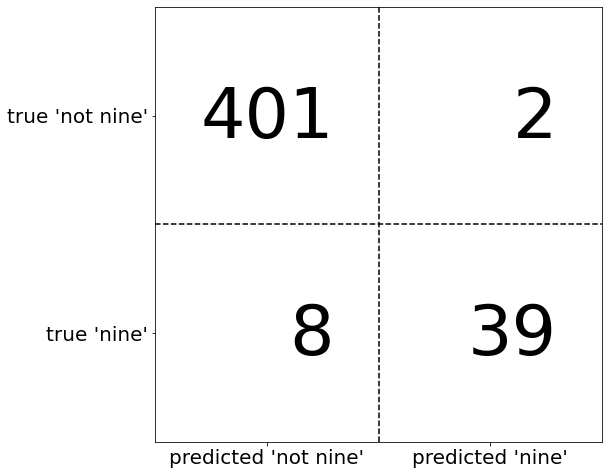

In [56]:
# '9와 9 아님' 분류 문제의 오차 행렬
mglearn.plots.plot_confusion_matrix_illustration()

- TN(True negative) : 진짜 음성, 실제 음성인데 예측도 음성

- TP(True positive) : 진짜 양성, 실제 양성인데 예측도 양성

- FN : False negative로 거짓 음성, 실제는 양성인데 예측은 음성

- FP(False positive) : 거짓 양성, 실제는 음성인데 예측은 양성


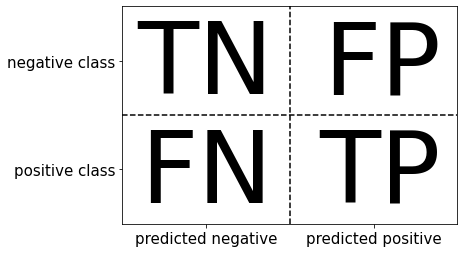

In [57]:
# 이진 분류의 오차 행렬
mglearn.plots.plot_binary_confusion_matrix()

In [58]:
# 더미 모델 두개, 결정 트리, 로지스틱 회귀
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[361  42]
 [ 43   4]]

결정 트리
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[402   1]
 [  6  41]]


- pred_most_frequent : 항상 동일한 클래스를 예측하기 때문에 잘못된 결과가 출력

- pred_dummy : 거짓 음성(FN)과 거짓 양성(FP)보다 진짜 양성(TP)이 매우 적고, 진짜 양성(TP)보다 거짓 양성(FP)가 매우 많음

- pred_tree : pred_dummy보다 정상적으로 출력되었지만, 정확도는 비슷함

- logreg : 진짜 양성(TP)과 진짜 거짓(TN)이 더 많은 반면, 거짓 양성(FP)과 거짓 음성(FN)은 적음

&rarr; 결정 트리와 로지스틱 회귀만 정상적으로 출력되었으며, 로지스틱이 결정 트리보다 더 잘 작동함

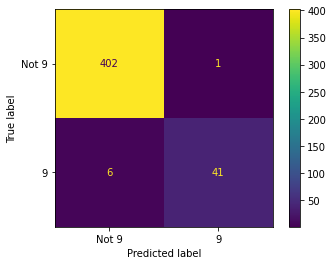

In [59]:
# 오차 행렬을 시각화 1
# from_estimator : 오차 행렬을 그림
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels = ['Not 9', '9'])
plt.show()

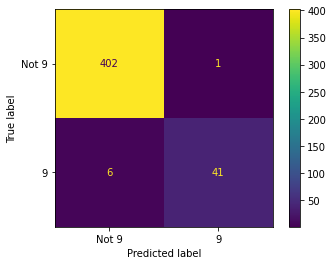

In [60]:
# 오차 행렬 시각화 2
# from_predictions : 예측 결과로부터 오차 행렬을 그림, pred_logreg를 전달
ConfusionMatrixDisplay.from_predictions(y_test, pred_logreg, display_labels = ['Not 9', '9'])
plt.show()

##### **정확도와의 관계**

정확도(accuracy)는 정확히 예측한 수(TP + TN)를 전체 샘플 수(오차 행렬의 모든 항목을 더한 값)로 나눈 것이다.

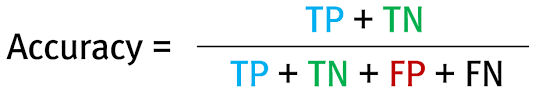

##### **정밀도, 재현율, f-점수**

오차 행렬의 결과를 요약하는 방법

1) **정밀도(precision)** : 양성으로 예측된 것(TP + FP) 중 얼마나 많은 샘플이 진짜 양성(TP)인지 측정

- 거짓 양성(FP)의 수를 줄이는 것이 목표일 때 성능 지표로 사용 = 높은 정밀도가 중요한 경우

- **양성 예측도(PPV)**라고도 함

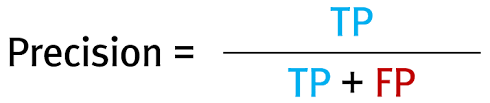

2) **재현율(recall)** : 전체 양성 샘플(TP + FN) 중에서 얼마나 많은 샘플이 양성 클래스 (TP)로 분류되는지 측정

- 모든 양성 샘플을 식별해야 할 때 성능 지표로 사용 = 거짓 음성(FN)을 피하는 것

- **민감도(sensitivity), 적중률(hit rate), 진짜 양성 비율(TPR)**이라고도 함

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSXI1znMH_ddGH_GzTDrTE0IwSl6jC-jc3yG1NnSLrfpHmG8H0h5dRODe2EOokKTtispg&usqp=CAU">

재현율 최적화와 정밀도 최적화는 상충되며 재현율이 완벽해지면 정밀도는 매우 낮아지며, 정밀도가 완벽해지면 재현율은 매우 낮아진다.

**f-점수(f-score) or f-측정(f-measure)** : 재현율과 정밀도로 전체적은 그림을 볼 수 없으므로 이를 이용해 조화 평균을 내 재현율과 정밀도의 결과를 요얄 할 수 있음 

<img src = "https://images.velog.io/images/jadon/post/f06f1d40-605d-4f13-b6ce-35c220c82968/image.png">



In [61]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.09
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


- 빈도 기반 모델 : 양성 클래스로 예측된 것이 존재하지 않아 f1-점수의 분모가 0이 되므로 에러가 뜬다.

- 무작위 더미 모델 & 트리 모델 : 정확도에서는 없었던 뚜렷한 차이를 알 수 있다.

*f1-점수를 사용해 평가하면 예측 성능이 다시 하나의 숫자로 요약되지만 정확도보다 이해하거나 설명하기가 어렵다.*

In [62]:
# classification_report : 정밀도, 재현율, f1-score 모두 한 번에 계산하여 출력
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names = ["Not 9", "9"], zero_division = 0))

              precision    recall  f1-score   support

       Not 9       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



**classification_report 출력 결과 분석**

- 클래스마다 한 줄씩 출력을 만들고, 각 클래스가 양성일 때 정밀도, 재현율, f1-점수를 리포트함

- 마지막 열은 각 클래스에 대한 지지도(support)로, 단순히 이 클래스에 있는 진짜 샘플의 수를 의미

- 마지막 세 줄은 정밀도, 재현율, f1-점수의 평균을 보여줌

- macro avg : 클래스별 점수의 평균

- weighted avg : 클래스의 샘플 수로 가중 평균

In [63]:
print(classification_report(y_test, pred_dummy, target_names = ["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.89      0.90      0.89       403
           9       0.09      0.09      0.09        47

    accuracy                           0.81       450
   macro avg       0.49      0.49      0.49       450
weighted avg       0.81      0.81      0.81       450



In [64]:
print(classification_report(y_test, pred_logreg, target_names = ["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



어떤 클래스를 양성 클래스로 선택하느냐가 이 평가 지표에 큰 영향을 끼치는 것을 알 수 있다.

&rarr; ' 9 ' 클래스의  f1-점수는 0.19이지만 (로지스틱 회귀는 0.92), ' 9 아님 ' 클래스는 각각 0.92와 0.99이다.

*두 모델의 비교를 통해 로지스틱 회귀 모델의 우수성을 알 수 있다.*

#### 불확실성 고려

오차 행렬과 분류 리포트가 예측 결과를 자세히 분석할 수 있도록 도와주지만 예측값은 모델에 담긴 많은 정보가 이미 손실된 상태이다.

&rarr; 예측의 확신을 가늠하기 위해 decision_function이나 predict_proba 메서드를 사용(출력의 임계값을 검증)

*In 이진 탐색*

- decision_function : 0이 임계값임

-  predict_proba : 0.5가 임계값임

In [65]:
# 결정 함수의 히트맵과 임계값 변화에 따른 영향을 시각화
# 중앙 윗부분의 검은 원 : decision_function이 정확히 0일 때의 임계값을 나타냄
# 원 안의 포인트는 양성 클래스로 바깥쪽 포인트는 음성 클래스로 분류
X, y = make_blobs(n_samples = (400, 50), cluster_std = [7.0, 2], random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
svc = SVC(gamma = .05).fit(X_train, y_train)

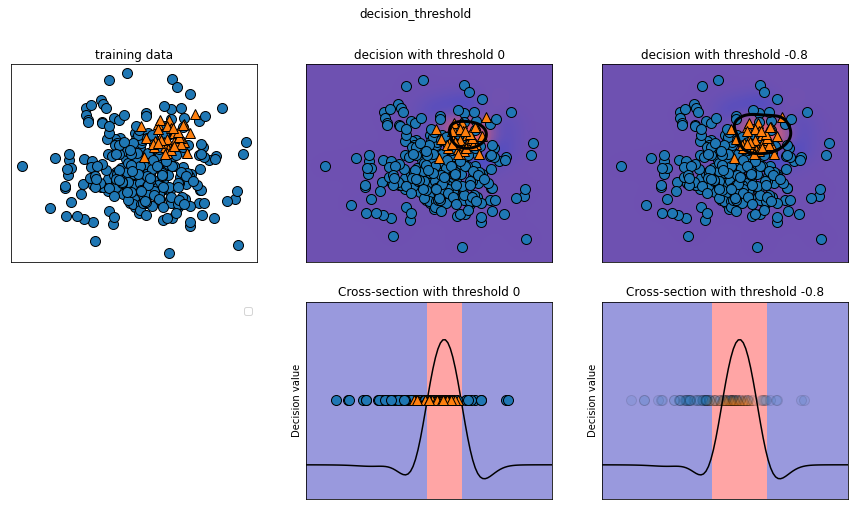

In [66]:
mglearn.plots.plot_decision_threshold()

In [67]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



**출력된 결과 분석**

- 클래스 1에 대해 상당히 작은 정밀도(precision)를 얻었으며 재현율(recall)은 절반 정도이다.

- 클래스 0의 샘플이 매우 많으므로 분류기는 소수인 클래스 1보다 클래스 0에 초점을 맞추고 있다.

ex) 클래스 1의 재현율(precision) 높이기

(클래스 1로 잘못 분류된) 거짓 양성(FP)이 늘어나더라도 (재현율을 높이기 위해) 진짜 양성(TP)을 늘리려 함

&rarr; 임계값을 바꿔 클래스 1의 재현율을 높이도록 예측을 조정 

In [68]:
# 0보다 큰 클래스는 1로 분류 -> 임계값 낮추기
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [69]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



**출력값을 분석**

- 클래스 1의 재현율이 높아졌고 정밀도는 낮아짐

*재현율보다 정밀도가 중요하거나 그 반대, 또는 데이터가 심하게 불균형일 때 결정 함수의 임계값을 바꾸면 더 나은 결과를 얻을 수 있다.*

**주의할 점**

- 임계값을 선택할 때 테스트 세트를 사용하지 않도록 주의해야함

- 검증 세트나 교차 검증을 사용

**Predict_proba 메서드**

- 출력이 0에서 1 사이로 고정되니 임계값을 선택하기 쉬움

- 기본값이 0.5를 임계값으로 설정하면 양성 클래스라는 확신이 50% 이상일 때 양성으로 분류

- 임계값을 높이면 양성 클래스로 분류할 때 더 큰 확신이 있어야함(음성 클래스는 확신이 덜 필요)

#### 정밀도-재현율 곡선과 ROC 곡선

임계값을 바꾸는 것 = 정밀도와 재현율의 상충 관계를 조정하는 일

분류기의 필요조건을 지정하는 것을 **운영 포인트(operating point)를 지정한다고 말할 수 있다.

*if 운영 포인트가 명확하지 않은 경우*

- 임계값을 조사

- 동시에 정밀도나 재현율의 모든 장단점을 살펴보기

&rarr; **정밀도-재현율 곡선(precision-recall curve)**을 사용

In [70]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

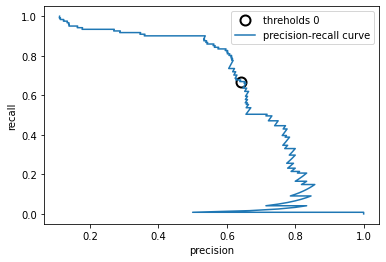

In [71]:
# 부드러운 곡선을 위해 데이터 포인트 수를 늘림
X, y = make_blobs(n_samples = (4000, 500), cluster_std = [7.0, 2], random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

svc = SVC(gamma = .05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
# 0에 가까운 임계값 찾기
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10, label = "threholds 0", fillstyle = "none", c = 'k', mew = 2)
plt.plot(precision, recall, label = "precision-recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc = "best")
plt.show()

**그래프 분석**

- 곡선이 오른쪽 위로 갈수록 더 좋은 분류기다. &rarr; 정밀도와 재현율이 모두 높은 곳임

- 임계값이 높을수록 양성으로 분류된 포인트 대부분이 진짜 양성(TP)이 되며, 정밀도가 매우 높아지지만 재현율은 낮아짐

- 정밀도(precision)이 0.5보다 크면 정밀도 증가에 따른 재현율 손실이 커진다.

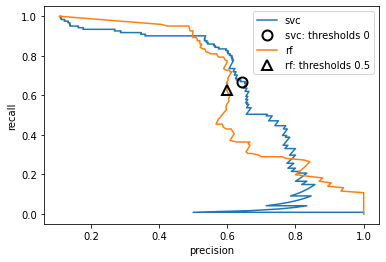

In [72]:
# SVM과 랜덤 포레스트의 정밀도-재현율 곡선 비교
# 분류기 변경 -> 운영 포인트가 달라짐
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 0, max_features = 2)
rf.fit(X_train, y_train)

# RandomForestClassifier는 decision_function 대신 predict_proba를 제공
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label = "svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10, label = "svc: thresholds 0", fillstyle = "none", c = 'k', mew = 2)
plt.plot(precision_rf, recall_rf, label = "rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c = 'k', markersize = 10, label = "rf: thresholds 0.5", fillstyle = "none", mew = 2)
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc = "best")
plt.show()

**그래프 분석**

- 재현율이 매우 높거나 정밀도가 매우 높을 때는 랜덤 포레스트가 더 낫음

- 가운데 근처(정밀도 = 0.7 정도)에서는 SVM이 더 좋음

- f1-점수는 정밀도-재현율 곡선의 한 지점인 기본 임계값에 대한 점수

In [73]:
print("랜덤 포레스트의 f1_score: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("svc의 f1_score: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1_score: 0.610
svc의 f1_score: 0.656


**평균 정밀도(average precision)** : 정밀도-재현율 곡선의 아랫부분 면적을 계산한 값으로 전체 곡선에 담긴 정보를 요약이 필요할 떄 사용

In [74]:
# average_precision_score : 평균 정밀도를 계산
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.666


**평균 정밀도 특징**

- 0에서 1 사이를 지나는 곡선의 아래 면적이므로 항상 0(가장 나쁨)과 1(가장 좋음) 사이의 값을 반환

- 무작위로 예측하는 분류기의 decision_function의 평균 정밀도는 데이터셋에 있는 양성 클래스의 비율이 됨

***NOTE_ PrecisionRecallDisplay 클래스***

- 정밀도-재현율 곡선을 그래는 클래스임
- from_estimator 함수와 예측 결과를 사용하는 from_predictions 함수를 제공한다.
- 재현율을 x 축에 놓고 정밀도를 y 축에 놓임

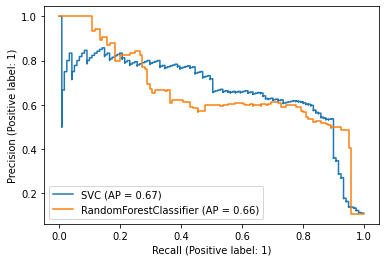

In [75]:
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots()
# SVC 곡선 그리기
PrecisionRecallDisplay.from_estimator(svc, X_test, y_test, ax = ax)
# 랜덤 포레스트 곡선 그리기
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test, ax =ax)
plt.show()

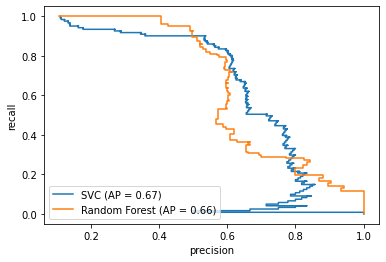

In [76]:
# x축과 y축을 서로 바꿔 그림
fig, ax = plt.subplots()
# SVC 곡선 그리기
disp = PrecisionRecallDisplay(precision = recall, recall = precision, average_precision = ap_svc, estimator_name = 'SVC')
disp.plot(ax = ax)
# 랜덤 포레스트 곡선 그리기
disp = PrecisionRecallDisplay(precision = recall_rf, recall = precision_rf, average_precision = ap_rf, estimator_name = 'Random Forest')
disp.plot(ax = ax)
ax.set(xlabel = 'precision', ylabel = 'recall')
plt.show()

#### ROC와 AUC

**ROC 곡선** : 여러 임계값에서 분류기의 특성을 분석하는 데 널리 사용하는 도구

- 분류기의 모든 임계값을 고려

- 정밀도와 재현율 대신 **진짜 양성 비율(TPR)**에 대한 **거짓 양성 비율(FPR)**을 나타냄

  - 진짜 양성 비율 = 재현율

  - 거짓 양성 비율 : 전체 음성 샘플 중에서 거짓 양성으로 잘못 분류한 비율

<img src = "https://miro.medium.com/max/506/1*YHYVVN_lu4_fhtGYyziC1w.png">

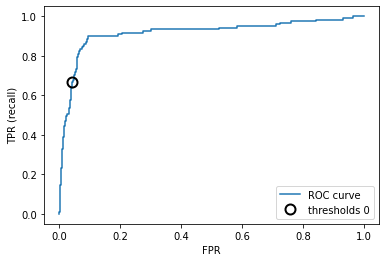

In [77]:
# SVM의 ROC 곡선
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label = "ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# 0 근처의 임계값 찾기
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10, label = "thresholds 0", fillstyle = "none", c = 'k', mew = 2)
plt.legend(loc = 4)
plt.show()

**그래프 분석**

- ROC 곡선은 왼쪽 위에 가까울수록 이상적

- 거짓 양성 비율(FPR)이 낮게 유지되면 재현율이 높은 분류기가 좋은 것임

- 기본 임계값 0의 지점과 비교했을 때, FPR을 조금 늘리면 재현율을 아주 크게 높일 수 있음(0.9 부근)

- 왼쪽 위에 가장 가까운 지점이 더 좋은 운영 포인트

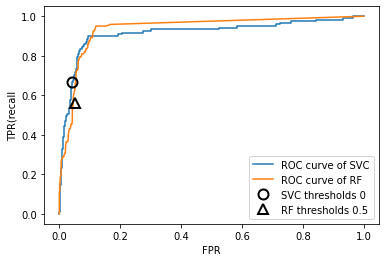

In [78]:
# SVM과 랜덤 포레스트의 ROC 곡선 비교
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label = "ROC curve of SVC")
plt.plot(fpr_rf, tpr_rf, label = "ROC curve of RF")

plt.xlabel("FPR")
plt.ylabel("TPR(recall")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10, label = "SVC thresholds 0", fillstyle = "none", c = 'k', mew = 2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize = 10, label = "RF thresholds 0.5", fillstyle = "none", c = 'k', mew = 2)
plt.legend(loc = 4)
plt.show()

In [79]:
# 곡선 아래의 면적값 하나로 ROC 곡선을 요약
# AUC(area under the curve) : 곡선 아래의 면적
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 AUC: {:.3f}".format(rf_auc))
print("SVC의 AUC: {:.3f}".format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916


**AUC 특징**

- 0과 1 사이의 곡선 아래 면적이므로 항상 0(최악)과 1(최선) 사이의 값을 갖는다.

- 데이터셋에 담긴 클래스가 아무리 불균형하더라도 무작위로 예측한 AUC 값은 0.5가 된다.<br>
&rarr; 불균형 데이터셋에서는 정확도보다 AUC가 훨씬 좋은 지표임

- 양성 샘플의 순위를 평가하는 것 = 무작위로 선택한 양성 클래스 포인트의 점수가 무작위로 선택한 음성 클래스 포인트의 점수보다 높을 확률과 같음

    if ) AUC = 1, 모든 양성 포인트 점수가 무든 음성 포인트의 점수보다 높음

***NOTE_ RocCurveDisplay***

- ROC 곡선을 그리는 클래스

- 추정기 객체를 사용하는 from_estimator 함수와 예측 결과를 사용하는 from_predictions 함수를 제공

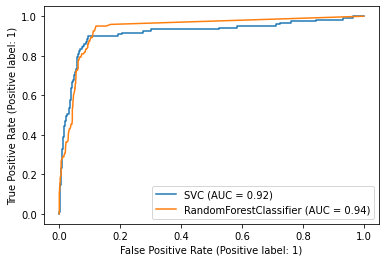

In [80]:
# from_estimator 함수 사용
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()
# SVC 곡선 그리기
RocCurveDisplay.from_estimator(svc, X_test, y_test, ax = ax)
# 랜덤 포레스트 곡선 그리기
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax = ax)
plt.show()

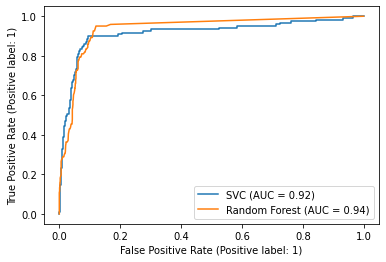

In [81]:
# from_predictions 함수 사용
fig, ax = plt.subplots()
# SVC 곡선 그리기
RocCurveDisplay.from_predictions(y_test, svc.decision_function(X_test), name = 'SVC', ax = ax)
# 랜덤 포레스트 곡선 그리기
RocCurveDisplay.from_predictions(y_test, rf.predict_proba(X_test)[:, 1], name = 'Random Forest', ax = ax)
plt.show()

gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.10 accuracy = 0.90 AUC = 0.96
gamma = 0.01 accuracy = 0.90 AUC = 1.00


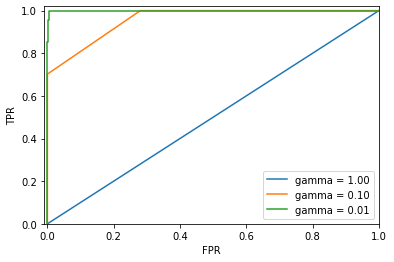

In [82]:
# 각기 다른 gamma를 가진 SVM의 ROC 곡선 비교
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
  svc = SVC(gamma = gamma).fit(X_train, y_train)
  accuracy = svc.score(X_test, y_test)
  auc = roc_auc_score(y_test, svc.decision_function(X_test))
  fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
  print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(gamma, accuracy, auc))
  plt.plot(fpr, tpr, label = "gamma = {:.2f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc = "best")
plt.show()

**그래프 분석**

- gamma = 1.0 : AUC는 무작위로 선택한 수준

- gamma = 0.1 : AUC 값이 0.96으로 크게 향상되었음

- gamma = 0.01 : AUC 값이 1이며 모든 양성 포인트는 어떤 음성 포인트보다 더 높은 점수를 갖는다.<br>
  = 데이터를 완벽하게 분류할 수 있음, 임계값을 조정해서 아주 높은 예측 성능을 얻을 수 있음

### 5.3.3 다중 분류의 평가 지표

다중 분류를 위한 지표는 모두 이진 분류 평가 지표에서 유도되었으며, 다만 모든 클래스에 대해 평균을 낸 것이다.

- 다중 분류의 정확도 = 분류된 샘플의 비율

- 정확도 외에 오차 행렬, 분류 리포트도 사용

In [83]:
# 오차 행렬 출력
# 각 행은 정답 레이블에 해당하며 열은 예측 레이블에 해당
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state = 0)
lr = LogisticRegression(max_iter = 5000).fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion_matrix:\n", confusion_matrix(y_test, pred))

Accuracy: 0.953
Confusion_matrix:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


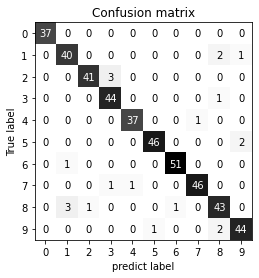

In [84]:
# 10개 숫자 분류 문제의 오차 행렬
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel = 'predict label', 
                                     ylabel = 'True label', xticklabels = digits.target_names, 
                                     yticklabels = digits.target_names, cmap = plt.cm.gray_r, fmt = "%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [85]:
# classification_report 함수를 사용해서 정밀도, 재현율, f1-점수를 계산
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



**다중 분류에서 불균형 데이터셋을 위해 가장 널리 사용하는 평가 지표는 f1-점수의 다중 분류 버전이다**

1) 다중 클래스용 f1-점수는 한 클래스를 양성 클래스로 두고 나머지 클래스들을 음성 클래스로 간주하여 클래스마다 f1-점수를 계산

2) 클래스별 f1-점수를 다음 전략 중 하나를 사용하여 평균을 냄

- 'macro' 평균은 클래스별 f1-점수에 가중치를 주지 않습니다. 클래스 크기에 상관없이 모든 클래스를 같은 비중으로 다룸

- 'weighted' 평균은 클래스별 샘플 수로 가중치를 두어 f1-점수의 평균을 계산

- 'micro' 평균은 모든 클래스의 거짓 양성(FP), 거짓 음성(FN), 진짜 양성(TP)의 총 수를 헤아린 다음 정밀도, 재현율, f1-점수를 이 수치로 계산

In [86]:
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average = "micro")))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average = "macro")))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


### 5.3.4 회귀의 평가 지표

회귀 평가는 분류에서와 비슷하게 할 수 있다.

- 타깃을 과대 예측한 것 대비 과소 예측한 것을 분석

- 대부분은 score 메서드에서 이용하는 R^2만으로 충분함

- 가끔 평균 제곱 에러나 평균 절댓값 에러를 사용하여 모델을 튜닝하여 비지니스 결정을 할 수 있음(일반적으로는 R^2가 더 나음)

### 5.3.5 모델 선택에서 평가 지표 사용하기

GridSearchCV나 cross_val_score를 사용하여 모델 선택 + AUC 같은 평가 지표를 사용

*&rarr; GridSearchCV 와 cross_val_score의 scoring 매개변수를 통해 구현*

In [87]:
# 분류의 기본 평가 지표 -> 정확도
print("기본 평가 지표:", cross_val_score(SVC(), digits.data, digits.target == 9, cv=5))
# scoring="accuracy"의 결과와 동일
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy", cv=5)
print("정확도 지표:", explicit_accuracy)
ap =  cross_val_score(SVC(), digits.data, digits.target == 9, scoring="average_precision", cv=5)
print("평균 정밀도 지표:", ap)

기본 평가 지표: [0.975      0.99166667 1.         0.99442897 0.98050139]
정확도 지표: [0.975      0.99166667 1.         0.99442897 0.98050139]
평균 정밀도 지표: [0.97562403 0.9886322  1.         0.99853801 0.95015534]


In [88]:
# cross_validate : 한번에 계산 가능
res = cross_validate(SVC(), digits.data, digits.target == 9, scoring=["accuracy", "average_precision", "recall_macro"], return_train_score=True, cv=5)
pd.DataFrame(res)

,fit_time,score_time,test_accuracy,train_accuracy,test_average_precision,train_average_precision,test_recall_macro,train_recall_macro
0,0.017069,0.012423,0.975000,0.994433,0.975624,0.994997,0.887346,0.972222
1,0.016125,0.011720,0.991667,0.995825,0.988632,0.996010,0.958333,0.982252
2,0.017269,0.012418,1.000000,0.995132,1.000000,0.995317,1.000000,0.978780
3,0.017814,0.012774,0.994429,0.995828,0.998538,0.995257,0.972222,0.982252
4,0.018141,0.012158,0.980501,0.996523,0.950155,0.999257,0.902778,0.985725


In [89]:
# GridSearchCV에서 최적의 매개변수를 선택하기 위한 평가 지표를 바꿀 수 있음
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state = 0)

# 일부러 적절하지 않은 그리드르 형성
param_grid = {'gamma' : [0.0001, 0.01, 0.1, 1, 10]}
# 기본 정확도 측정 지표를 사용
grid = GridSearchCV(SVC(), param_grid = param_grid, cv = 3)
grid.fit(X_train, y_train)
print("정확도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수(정확도)): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(grid.score(X_test, y_test)))

정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.0001}
최상의 교차 검증 점수(정확도)): 0.972
테스트 세트 평균 정밀도: 0.966
테스트 세트 정확도: 0.973


In [90]:
# 평균 정밀도 지표 사용
grid = GridSearchCV(SVC(), param_grid = param_grid, scoring = "average_precision", cv = 3)
grid.fit(X_train, y_train)
print("평균 정밀도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수(평균 정밀도): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(grid.score(X_test, y_test)))

평균 정밀도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.01}
최상의 교차 검증 점수(평균 정밀도): 0.985
테스트 세트 평균 정밀도: 0.996
테스트 세트 정확도: 0.996


- 정확도를 사용할 때는 gamma = 0.001이 선택

  - 정확도를 최적화하기 위한 매개변수 사용 &rarr; 테스트 세트의 정확도가 더 높음

- 평균 정밀도를 사용할 떄는 gamma = 0.01이 선택

  - 평균 정밀도를 최적화하기 위한 매개변수 사용 &rarr; 테스트 세트의 평균 정밀도가 더 높음


**분류 문제**

- scoring 매개변수의 중요한 옵션
  
  - accuracy(정확도)
  
  - ROC 곡선의 아래 면적인 roc_auc
  
  - 정확도-재현율 곡선의 아래 면적인 average_precision
  
  - 이진 f1-점수인 f1과 가중치 방식에 따라 f1_macro, f1_micro, f1_weighted

**회귀 문제**

- R^2 점수를 나타내는 r2

- 평균 제곱 오차인 meg_mean_squared_error

- 평균 절댓값 오차인 neg_mean_absolute_error

## 5.4 요약 및 정리